## HW: Simulation ##

### due 2019-11-05 ###

HW submission by group (up to 4 people)
* Taoyu Cai (taoyuc3@illinois.edu)


### imports ###

In [7]:
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import scipy.stats

N_samples=1500
SEED=0

In [8]:
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

**Problem:**  Suppose that we have a factory which costs \\$20M a day to run.  When it is working, it generates \\$45M in revenue (i.e., \\$25M in profit).  The assembly line in the factory runs at 90%
reliability (i.e., a coin flip with bias 0.9), and makes \\$45M that day (and incurs the \\$20M cost).  When it breaks down, it recovers in one day with 60%
probability, and recovers in the second day with probability 40%.  When it is not working, it still incurs the \\$20M cost.
What is the average profit in the assembly line in 250 days of work (a year)?

In [9]:
class simulator:
    bias=0.90
    bias1=0.60
    bias2=0.40
    YEAR=250
    daily_costs=20
    daily_earnings=45
    DownDays=2
    
    @classmethod
    def sim(cls,verbose=False):
        repairstatus=0 # system is working
        ctr=1
        running_earnings=0
        repairdaysleft=0
        while True: #morning
                       
            if (repairdaysleft>0 and scipy.stats.bernoulli.rvs(cls.bias2)==1): #repaired in 2 days
                running_earnings+=-cls.daily_costs
                repairdaysleft-=1
                
            elif(repairdaysleft>0 and scipy.stats.bernoulli.rvs(cls.bias1)==1): #repaired in 1 day
                running_earnings+=-cls.daily_costs
                repairdaysleft=0
                
                
            elif(scipy.stats.bernoulli.rvs(cls.bias)==1): #working, but toss a coin to decide if another failure
                running_earnings+=cls.daily_earnings-cls.daily_costs
                repairdaysleft=0
                
            else: #new failure
                running_earnings+=-cls.daily_costs
                repairdaysleft=cls.DownDays
            
            if (ctr==cls.YEAR):
                break
             
            
            if verbose:
                print("ctr={0:}; repairdaysleft={1:}".format(ctr,repairdaysleft))
            ctr+=1

                
        return running_earnings
        
        
simulator.sim(verbose=True)

ctr=1; repairdaysleft=0
ctr=2; repairdaysleft=0
ctr=3; repairdaysleft=0
ctr=4; repairdaysleft=0
ctr=5; repairdaysleft=0
ctr=6; repairdaysleft=0
ctr=7; repairdaysleft=2
ctr=8; repairdaysleft=0
ctr=9; repairdaysleft=0
ctr=10; repairdaysleft=0
ctr=11; repairdaysleft=0
ctr=12; repairdaysleft=0
ctr=13; repairdaysleft=2
ctr=14; repairdaysleft=1
ctr=15; repairdaysleft=0
ctr=16; repairdaysleft=2
ctr=17; repairdaysleft=0
ctr=18; repairdaysleft=0
ctr=19; repairdaysleft=0
ctr=20; repairdaysleft=0
ctr=21; repairdaysleft=2
ctr=22; repairdaysleft=1
ctr=23; repairdaysleft=0
ctr=24; repairdaysleft=0
ctr=25; repairdaysleft=0
ctr=26; repairdaysleft=0
ctr=27; repairdaysleft=0
ctr=28; repairdaysleft=0
ctr=29; repairdaysleft=0
ctr=30; repairdaysleft=0
ctr=31; repairdaysleft=0
ctr=32; repairdaysleft=0
ctr=33; repairdaysleft=0
ctr=34; repairdaysleft=0
ctr=35; repairdaysleft=0
ctr=36; repairdaysleft=0
ctr=37; repairdaysleft=0
ctr=38; repairdaysleft=0
ctr=39; repairdaysleft=0
ctr=40; repairdaysleft=0
ctr=41; r

4630

In [10]:
numpy.random.seed(SEED)
X_samples=numpy.array([simulator.sim() for n in range(N_samples)])
running_means=[numpy.mean(X_samples[:n+1]) for n in range(N_samples)]

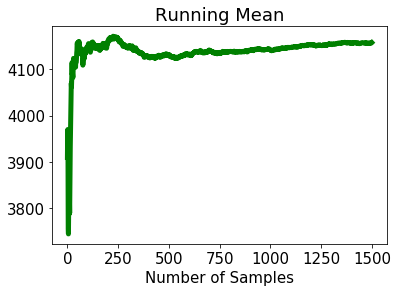

In [11]:
plt.figure()
plt.plot(running_means,label="sample mean",color="green")
plt.title("Running Mean")
plt.xlabel("Number of Samples")
plt.show()
plt.close()

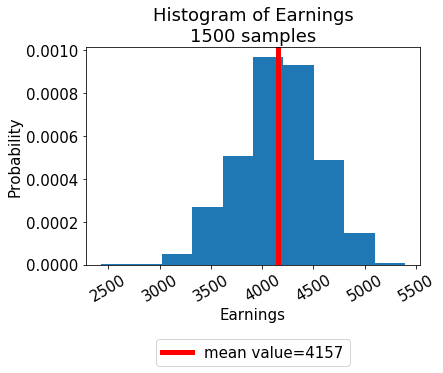

In [12]:
vals,freqs=numpy.unique(X_samples,return_counts=True)
plt.figure()
plt.hist(X_samples,density=True)
plt.axvline(x=running_means[-1],color="red",label="mean value={0:.0f}".format(running_means[-1]))
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.5))
plt.xticks(rotation=30)
plt.ylabel("Probability")
plt.xlabel("Earnings")
plt.title("Histogram of Earnings\n{:} samples".format(N_samples))
plt.show()

### Answer:
* The simulation sample is 1500.
* The mean value is 4157M dollars becasue in some cases the repaired time is one day instead of two, which promote an increase of mean value (average profit) in 250 days.